In [1]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Mylyn.csv')

In [3]:
data.shape

(1862, 62)

In [4]:
data.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,1,0.019228,0.024845,4,0.0,1.01,0.002216,0.018552,1.02,0.017874,...,0.000000,0.002801,0.020688,36,6,0.023730,1.15,0.116244,0.019133,clean
1,0,0.000000,0.000000,20,0.0,0.00,0.278898,0.000000,0.00,0.000000,...,0.013098,0.009791,0.006229,9,1,0.014303,3.13,0.254718,0.000000,buggy
2,1,0.000000,0.000000,0,0.0,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,9,1,0.000000,0.00,0.000000,0.000000,buggy
3,0,0.000734,0.056522,6,0.0,1.01,0.013173,0.001171,8.10,0.001505,...,0.000000,0.009791,0.000900,18,14,0.055485,3.10,0.347682,0.001253,clean
4,0,0.000000,0.010560,5,0.0,0.00,0.042989,0.000000,5.11,0.000000,...,0.022584,0.016354,0.002214,31,12,0.032393,2.04,0.262198,0.000000,clean


In [5]:
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        
        def convert_to_int(val):
            return text_digit_values[val]
        
        if(df[column].dtype != np.int64 and df[column].dtype != np.float64):
            column_elements = df[column].values.tolist()
            unique_elements = set(column_elements)
            
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x += 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

data = handle_non_numeric_data(data)
print(data.head())


   ck_oo_numberOfPrivateMethods  LDHH_lcom  LDHH_fanIn  \
0                             1   0.019228    0.024845   
1                             0   0.000000    0.000000   
2                             1   0.000000    0.000000   
3                             0   0.000734    0.056522   
4                             0   0.000000    0.010560   

   numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
0                                  4                            0.0   
1                                 20                            0.0   
2                                  0                            0.0   
3                                  6                            0.0   
4                                  5                            0.0   

   WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
0                     1.01     0.002216                    0.018552   
1                     0.00     0.278898                    0.000000   
2          

In [6]:
array = data.values
Z = array[:,0:61]
Y = array[:,61]

In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

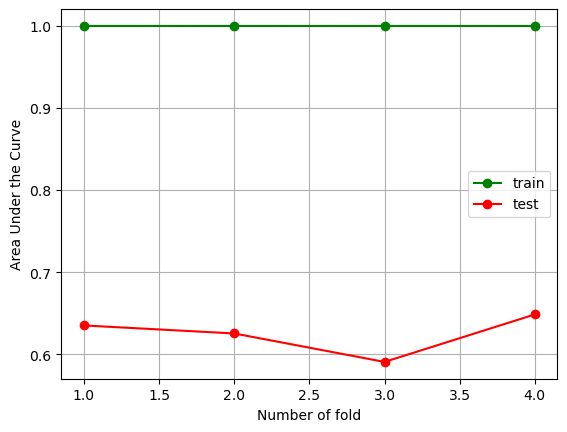

In [9]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [10]:
from sklearn.model_selection import RandomizedSearchCV
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
max_features = ['auto', 'sqrt','log2']
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy']}


In [11]:
dt_randomcv=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=6, min_samples_split=14, splitter=random; tot

[CV] END criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=230,

[CV] END criterion=entropy, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_

[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=120, max_features=auto, min_samples_leaf=2, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=120, max_features=auto, min_samples_leaf=2, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=120, max_features=auto, min_samples_leaf=2, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=890, max

[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_fea

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [12]:
dt_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Decision Tree Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm in training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1128
         1.0       1.00      0.97      0.99       175

    accuracy                           1.00      1303
   macro avg       1.00      0.99      0.99      1303
weighted avg       1.00      1.00      1.00      1303

[[1128    0]
 [   5  170]]
ACC:  0.9961627014581734
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       489
         1.0       0.28      0.31      0.29        70

    accuracy                           0.81       559
   macro avg       0.59      0.60      0.59       559
weighted avg       0.82      0.81      0.82       559

[[431  58]
 [ 48  22]]
ACC:  0.8103756708407871


In [14]:
best_random_grid = dt_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[467  22]
 [ 47  23]]
Accuracy Score 0.8765652951699463
Classification report:               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       489
         1.0       0.51      0.33      0.40        70

    accuracy                           0.88       559
   macro avg       0.71      0.64      0.67       559
weighted avg       0.86      0.88      0.86       559



In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [dt_randomcv.best_params_['criterion']],
    'max_depth': [dt_randomcv.best_params_['max_depth']],
    'splitter': [dt_randomcv.best_params_['splitter']],
    'max_features': [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf': [dt_randomcv.best_params_['min_samples_leaf'], 
                         dt_randomcv.best_params_['min_samples_leaf']+2, 
                         dt_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [dt_randomcv.best_params_['min_samples_split'] - 2,
                          dt_randomcv.best_params_['min_samples_split'] - 1,
                          dt_randomcv.best_params_['min_samples_split'], 
                          dt_randomcv.best_params_['min_samples_split'] +1,
                          dt_randomcv.best_params_['min_samples_split'] + 2]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [10], 'splitter': ['random'], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [12, 13, 14, 15, 16]}


In [16]:
dt = tree.DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; tota

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=13, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=13, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=13, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=13, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=13, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=13, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=13, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_featu

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'splitter': ['random']},
             verbose=2)

In [17]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=15, splitter='random')

In [18]:
best_grid = grid_search.best_estimator_

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[1116   12]
 [ 146   29]]
Auc Score 0.8260739614994934
Accuracy Score 0.8787413660782809
Classification report:               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1128
         1.0       0.71      0.17      0.27       175

    accuracy                           0.88      1303
   macro avg       0.80      0.58      0.60      1303
weighted avg       0.86      0.88      0.84      1303

Decision Tree Testing Result
[[481   8]
 [ 64   6]]
Auc Score 0.7436751387671633
Accuracy Score 0.8711985688729875
Classification report:               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       489
         1.0       0.43      0.09      0.14        70

    accuracy                           0.87       559
   macro avg       0.66      0.53      0.54       559
weighted avg       0.83      0.87      0.83       559



In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

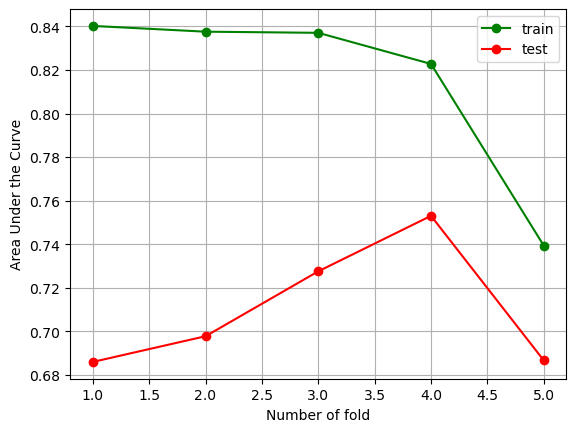

In [21]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1500)

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = LogisticRegression(solver='lbfgs', max_iter=1500)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

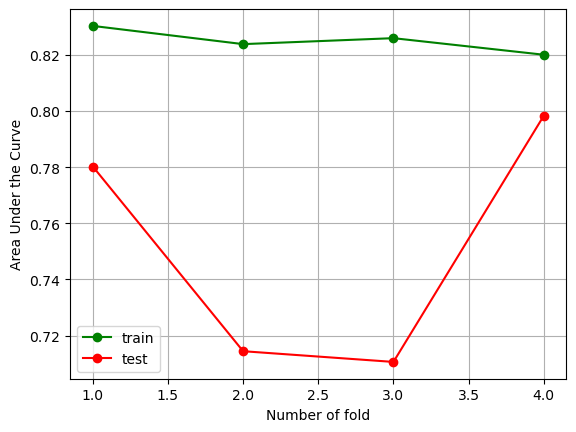

In [24]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Logistic Regression Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1128
         1.0       0.69      0.27      0.39       175

    accuracy                           0.89      1303
   macro avg       0.79      0.62      0.66      1303
weighted avg       0.87      0.89      0.86      1303

[[1107   21]
 [ 128   47]]
ACC:  0.8856485034535687
AUC:  0.8321859169199595
Logistic Regression Algorithm
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       489
         1.0       0.45      0.14      0.22        70

    accuracy                           0.87       559
   macro avg       0.67      0.56      0.57       559
weighted avg       0.83      0.87      0.84       559

[[477  12]
 [ 60  10]]
ACC:  0.8711985688729875
AUC:  0.7666374525270231


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1500)

In [27]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
# class_weight = ['balanced','None']
max_iter = [int(x) for x in np.linspace(1000, 3000, 10)]
multi_class = ['auto', 'ovr', 'multinomial'] 

random_grid = {
    'penalty': penalty,
    'solver' : solver,
    'C':C,
    'fit_intercept':fit_intercept,
#     'class_weight':class_weight,
    'max_iter':max_iter,
    'multi_class':multi_class
}
print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001], 'fit_intercept': [True, False], 'max_iter': [1000, 1222, 1444, 1666, 1888, 2111, 2333, 2555, 2777, 3000], 'multi_class': ['auto', 'ovr', 'multinomial']}


In [28]:
lr = LogisticRegression()
lr_randomcv=RandomizedSearchCV(estimator=lr,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=555)
lr_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   3.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   3.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   3.7s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   4.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   4.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   4.7s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2111, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2111, multi_cla

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   4.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   5.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   4.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   7.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   5.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   5.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   2.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   2.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   2.6s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=auto, pena

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   4.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   4.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   4.9s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   2.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   2.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   2.1s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2777, mul

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=saga; total time=   3.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=saga; total time=   3.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=saga; total time=   3.4s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   3.5s
[CV] END C=0.001, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   3.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   4.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   4.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   4.5s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   4.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   3.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   3.7s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   4.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   4.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   5.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   6.7s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   5.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   7.9s
[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.4min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.5min
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   3.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   3.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   4.1s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   3.1s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   3.6s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   3.5s
[CV] END C=0.001, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, ma

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   4.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   4.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   4.1s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   3.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   3.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   3.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   5.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   6.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   7.9s
[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.5s
[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.0s
[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time= 1.3min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time= 1.5min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time=  48.3s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   2.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   3.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   2.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   5.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   5.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   5.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   5.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   5.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   4.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=  16.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=  15.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=  12.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   7.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   6.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   7.7s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   2.9s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   3.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   3.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   2.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   2.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   2.7s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   4.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   4.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   4.6s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   4.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   4.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   4.5s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.1min


C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.2min
[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time=  51.5s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total t

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.5s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, ma

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.1min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg; total time= 1.2min


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   1.3s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   1.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   1.1s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   2.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   2.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   2.5s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   2.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   2.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Trace

[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   2.1s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, 

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [1000, 100, 10, 1.0, 0.1, 0.01,
                                              0.001],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 1222, 1444, 1666,
                                                     1888, 2111, 2333, 2555,
                                                     2777, 3000],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   ra

In [29]:
lr_randomcv.best_params_

{'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 2111,
 'fit_intercept': True,
 'C': 0.001}

In [30]:
best_random_grid = lr_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[478  11]
 [ 62   8]]
Accuracy Score 0.8694096601073346
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       489
         1.0       0.42      0.11      0.18        70

    accuracy                           0.87       559
   macro avg       0.65      0.55      0.55       559
weighted avg       0.83      0.87      0.84       559



In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver':[lr_randomcv.best_params_['solver']],
    'penalty':[lr_randomcv.best_params_['penalty']],
    'multi_class':[lr_randomcv.best_params_['multi_class']],
    'max_iter':[
        lr_randomcv.best_params_['max_iter']-100,
        lr_randomcv.best_params_['max_iter']-50,
        lr_randomcv.best_params_['max_iter'],
        lr_randomcv.best_params_['max_iter']+100,
        lr_randomcv.best_params_['max_iter']+50,
        lr_randomcv.best_params_['max_iter']+120
    ],
    'fit_intercept':[lr_randomcv.best_params_['fit_intercept']],
    'C':[
        lr_randomcv.best_params_['C']-0.0009,
        lr_randomcv.best_params_['C']-0.0005,
        lr_randomcv.best_params_['C']+0.005,
        lr_randomcv.best_params_['C']+0.0009
    ]
}

print(param_grid)

{'solver': ['newton-cg'], 'penalty': ['l2'], 'multi_class': ['ovr'], 'max_iter': [2011, 2061, 2111, 2211, 2161, 2231], 'fit_intercept': [True], 'C': [0.00010000000000000005, 0.0005, 0.006, 0.0019]}


In [32]:
lr = LogisticRegression()
grid_search=GridSearchCV(estimator=lr,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END C=0.00010000000000000005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.00010000000000000005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.00010000000000000005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.00010000000000000005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.00010000000000000005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.00010000000000000005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.00010000000000000005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; tota

[CV] END C=0.0005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0005, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0005, fit_intercept=True, m

[CV] END C=0.006, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.006, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.006, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.006, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.006, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.006, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.006, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.006, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.006, fit_intercept=True, max_iter=2

[CV] END C=0.0019, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0019, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0019, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0019, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0019, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0019, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0019, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0019, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.0019, fit_intercept=True, m

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.00010000000000000005, 0.0005, 0.006, 0.0019],
                         'fit_intercept': [True],
                         'max_iter': [2011, 2061, 2111, 2211, 2161, 2231],
                         'multi_class': ['ovr'], 'penalty': ['l2'],
                         'solver': ['newton-cg']},
             verbose=2)

In [33]:
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(C=0.0019, max_iter=2011, multi_class='ovr',
                   solver='newton-cg')

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Logistic Regression Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Logistic Regression Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Logistic Regression Training Result
[[1110   18]
 [ 141   34]]
Auc Score 0.8107776089159069
Accuracy Score 0.8779739063699156
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1128
         1.0       0.65      0.19      0.30       175

    accuracy                           0.88      1303
   macro avg       0.77      0.59      0.62      1303
weighted avg       0.86      0.88      0.85      1303

Logistic Regression Testing Result
[[478  11]
 [ 60  10]]
Auc Score 0.779111890154835
Accuracy Score 0.8729874776386404
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       489
         1.0       0.48      0.14      0.22        70

    accuracy                           0.87       559
   macro avg       0.68      0.56      0.58       559
weighted avg       0.84      0.87      0.84       559



In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

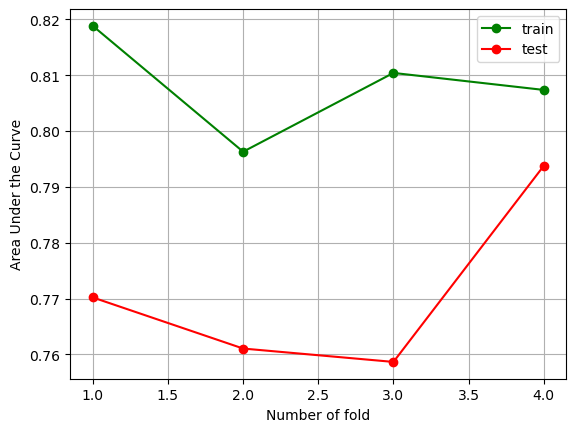

In [36]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = KNeighborsClassifier( n_neighbors=2)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

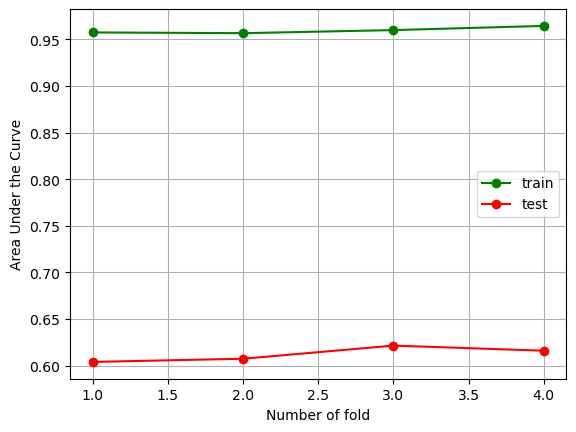

In [39]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1128
         1.0       1.00      0.29      0.45       175

    accuracy                           0.90      1303
   macro avg       0.95      0.65      0.70      1303
weighted avg       0.91      0.90      0.88      1303

[[1128    0]
 [ 124   51]]
ACC:  0.9048349961627015
AUC:  0.9553090172239108
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       489
         1.0       0.29      0.09      0.13        70

    accuracy                           0.86       559
   macro avg       0.58      0.53      0.53       559
weighted avg       0.81      0.86      0.82       559

[[474  15]
 [ 64   6]]
ACC:  0.8586762075134168
AUC:  0.6174116272275781


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [42]:
n_neighbors = [5,7,9,11,13,15]
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan']
random_grid = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'metric' : metric
}
print(random_grid)

{'n_neighbors': [5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}


In [43]:
from sklearn.model_selection import RandomizedSearchCV
knn_randomcv=RandomizedSearchCV(estimator=knn,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=55)
knn_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it 

[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski,

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=minkowski, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END .metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=15, weights=distance; total time=   0.0s


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   random_state=55, verbose=2)

In [44]:
knn_randomcv.best_params_

{'weights': 'uniform', 'n_neighbors': 13, 'metric': 'manhattan'}

In [45]:
best_random_grid = knn_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[475  14]
 [ 61   9]]
Accuracy Score 0.8658318425760286
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       489
         1.0       0.39      0.13      0.19        70

    accuracy                           0.87       559
   macro avg       0.64      0.55      0.56       559
weighted avg       0.82      0.87      0.84       559



C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'weights' : [knn_randomcv.best_params_['weights']],
    'metric' : [knn_randomcv.best_params_['metric']],
    'n_neighbors' : [
        knn_randomcv.best_params_['n_neighbors']-2,
        knn_randomcv.best_params_['n_neighbors']-1,
        knn_randomcv.best_params_['n_neighbors'],
        knn_randomcv.best_params_['n_neighbors']+2,
        knn_randomcv.best_params_['n_neighbors']+1,
    ]
}

print(param_grid)

{'weights': ['uniform'], 'metric': ['manhattan'], 'n_neighbors': [11, 12, 13, 15, 14]}


In [47]:
knn = KNeighborsClassifier()
grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=14, weights=uniform; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [11, 12, 13, 15, 14],
                         'weights': ['uniform']},
             verbose=2)

In [48]:
best_grid = grid_search.best_estimator_
best_grid

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("KNN Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("KNN Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

KNN Training Result
[[1107   21]
 [ 143   32]]
Auc Score 0.8640222897669706
Accuracy Score 0.874136607828089
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1128
         1.0       0.60      0.18      0.28       175

    accuracy                           0.87      1303
   macro avg       0.74      0.58      0.61      1303
weighted avg       0.85      0.87      0.84      1303

KNN Testing Result
[[473  16]
 [ 60  10]]
Auc Score 0.6913818288051417
Accuracy Score 0.8640429338103757
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       489
         1.0       0.38      0.14      0.21        70

    accuracy                           0.86       559
   macro avg       0.64      0.56      0.57       559
weighted avg       0.82      0.86      0.84       559



In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

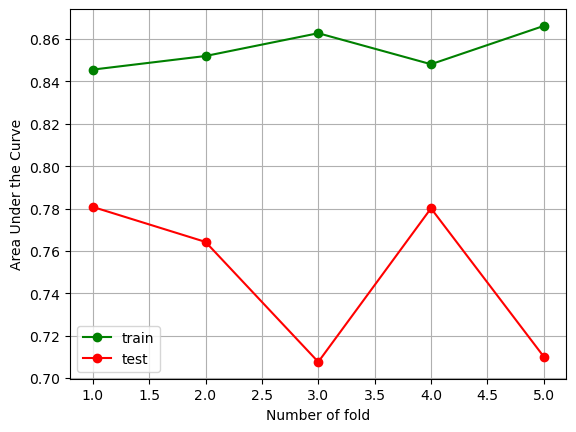

In [51]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [52]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      1128
         1.0       0.40      0.38      0.39       175

    accuracy                           0.84      1303
   macro avg       0.65      0.65      0.65      1303
weighted avg       0.84      0.84      0.84      1303

[[1031   97]
 [ 109   66]]
ACC:  0.841903300076746
AUC:  0.7172315096251266
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       489
         1.0       0.34      0.39      0.36        70

    accuracy                           0.83       559
   macro avg       0.62      0.64      0.63       559
weighted avg       0.84      0.83      0.83       559

[[436  53]
 [ 43  27]]
ACC:  0.8282647584973166
AUC:  0.7381390593047035


In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

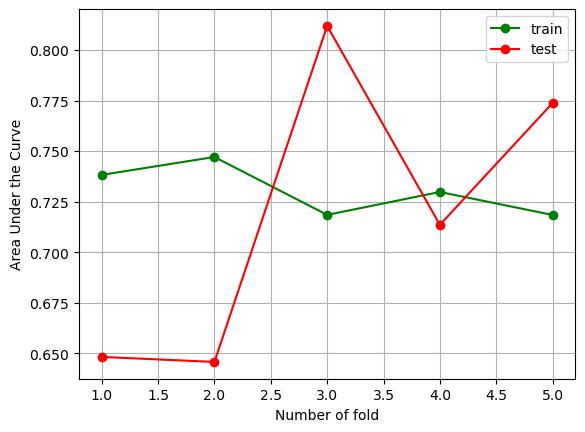

In [55]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [57]:
random_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
print(random_grid)

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00

In [58]:
from sklearn.model_selection import RandomizedSearchCV
nb_randomcv=RandomizedSearchCV(estimator=nb,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=555)
nb_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.5

[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0001873817422860383; total time=   0.0s
[CV] END ................var_smoothing=0.0001873817422860383; total time=   0.0s
[CV] END ................var_smoothing=0.0001873817422860383; total time=   0.0s
[CV] END ................var_smoothing=0.0001519911082952933; total time=   0.0s
[CV] END ................var_smoothing=0.0001519911082952933; total time=   0.0s
[CV] END ................var_smoothing=0.0001519911082952933; total time=   0.0s
[CV] END ................var_smoothing=0.0001232846739442066; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-08; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-08; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-08; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-08; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-08; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var

RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=555, verbose=2)

In [59]:
nb_randomcv.best_params_

{'var_smoothing': 0.04328761281083057}

In [60]:
best_random_grid = nb_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[318   4]
 [ 46   4]]
Accuracy Score 0.8655913978494624
Classification report:               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       322
         1.0       0.50      0.08      0.14        50

    accuracy                           0.87       372
   macro avg       0.69      0.53      0.53       372
weighted avg       0.82      0.87      0.82       372



In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb = GaussianNB()
grid_search=GridSearchCV(estimator=nb,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.

[CV] END ..................................var_smoothing=0.1; total time=   0.0s
[CV] END ..................................var_smoothing=0.1; total time=   0.0s
[CV] END ..................................var_smoothing=0.1; total time=   0.0s
[CV] END ..................................var_smoothing=0.1; total time=   0.0s
[CV] END ..................................var_smoothing=0.1; total time=   0.0s
[CV] END ..................var_smoothing=0.08111308307896872; total time=   0.0s
[CV] END ..................var_smoothing=0.08111308307896872; total time=   0.0s
[CV] END ..................var_smoothing=0.08111308307896872; total time=   0.0s
[CV] END ..................var_smoothing=0.08111308307896872; total time=   0.0s
[CV] END ..................var_smoothing=0.08111308307896872; total time=   0.0s
[CV] END ..................var_smoothing=0.08111308307896872; total time=   0.0s
[CV] END ..................var_smoothing=0.08111308307896872; total time=   0.0s
[CV] END ..................v

[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................va

[CV] END ................var_smoothing=0.0004328761281083057; total time=   0.0s
[CV] END ................var_smoothing=0.0004328761281083057; total time=   0.0s
[CV] END ................var_smoothing=0.0004328761281083057; total time=   0.0s
[CV] END ................var_smoothing=0.0004328761281083057; total time=   0.0s
[CV] END ................var_smoothing=0.0004328761281083057; total time=   0.0s
[CV] END ................var_smoothing=0.0004328761281083057; total time=   0.0s
[CV] END ................var_smoothing=0.0004328761281083057; total time=   0.0s
[CV] END ................var_smoothing=0.0004328761281083057; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-05; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-05; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-05; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-07; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-07; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-07; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-07; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-07; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-07; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-07; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-07; total time=   0.0s
[CV] END ................var

[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896856e-09; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896856e-09; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896856e-09; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896856e-09; total time=   0.0s
[CV] END ................var

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=2)

In [62]:
best_grid = grid_search.best_estimator_
print(best_grid)
grid_search.best_params_

GaussianNB(var_smoothing=0.0533669923120631)


{'var_smoothing': 0.0533669923120631}

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("KNN Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("KNN Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

KNN Training Result
[[1276   19]
 [ 174   21]]
Auc Score 0.6945965745965745
Accuracy Score 0.8704697986577181
Classification report:               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1295
         1.0       0.53      0.11      0.18       195

    accuracy                           0.87      1490
   macro avg       0.70      0.55      0.55      1490
weighted avg       0.83      0.87      0.83      1490

KNN Testing Result
[[318   4]
 [ 46   4]]
Auc Score 0.7289751552795031
Accuracy Score 0.8655913978494624
Classification report:               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       322
         1.0       0.50      0.08      0.14        50

    accuracy                           0.87       372
   macro avg       0.69      0.53      0.53       372
weighted avg       0.82      0.87      0.82       372



In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

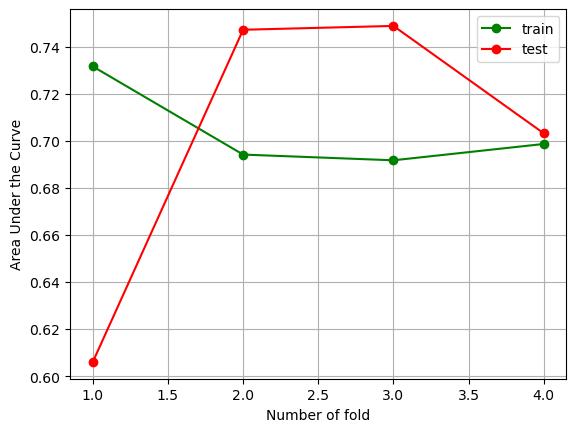

In [65]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [66]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=0.01, probability = True)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1128
         1.0       0.91      0.11      0.20       175

    accuracy                           0.88      1303
   macro avg       0.89      0.56      0.57      1303
weighted avg       0.88      0.88      0.84      1303

[[1126    2]
 [ 155   20]]
ACC:  0.8795088257866462
AUC:  0.8154787234042552
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       489
         1.0       0.83      0.07      0.13        70

    accuracy                           0.88       559
   macro avg       0.86      0.53      0.53       559
weighted avg       0.88      0.88      0.84       559

[[488   1]
 [ 65   5]]
ACC:  0.8819320214669052
AUC:  0.7659363131755771


In [69]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = svm.SVC(kernel='linear', C=0.01, probability = True)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

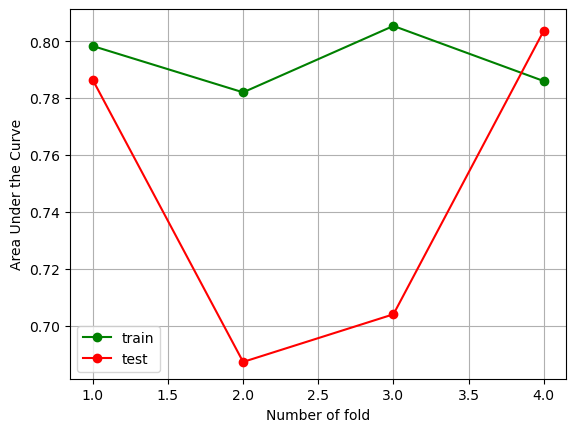

In [70]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
svc = svm.SVC(probability=True)
grid_search=GridSearchCV(estimator=svc,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END ...................

[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [72]:
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [73]:
grid_search.best_estimator_

SVC(C=1, gamma=1, probability=True)

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
best_grid = grid_search.best_estimator_
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("SVM Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("SVM Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

SVM Training Result
[[1212    2]
 [   4  179]]
Auc Score 0.987047739937523
Accuracy Score 0.9957050823192556
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1214
         1.0       0.99      0.98      0.98       183

    accuracy                           1.00      1397
   macro avg       0.99      0.99      0.99      1397
weighted avg       1.00      1.00      1.00      1397

SVM Testing Result
[[403   0]
 [ 61   1]]
Auc Score 0.5749219562955254
Accuracy Score 0.8688172043010752
Classification report:               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       403
         1.0       1.00      0.02      0.03        62

    accuracy                           0.87       465
   macro avg       0.93      0.51      0.48       465
weighted avg       0.89      0.87      0.81       465



In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

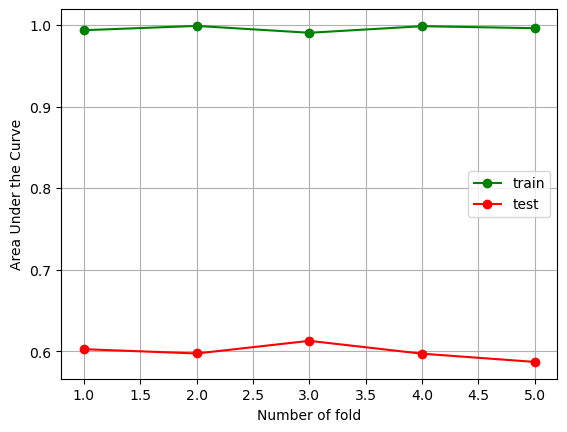

In [77]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()